In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv',usecols=['Survived','Pclass','Age','Fare'])

In [3]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [5]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

### Gaussian Transformation
- Logarithamic Transformation
- Reciprocal Transformation
- SquareRoot Transformation
- Exponential Transformation
- Boxcox Transformation

In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pylab

In [10]:
def graph_plot(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

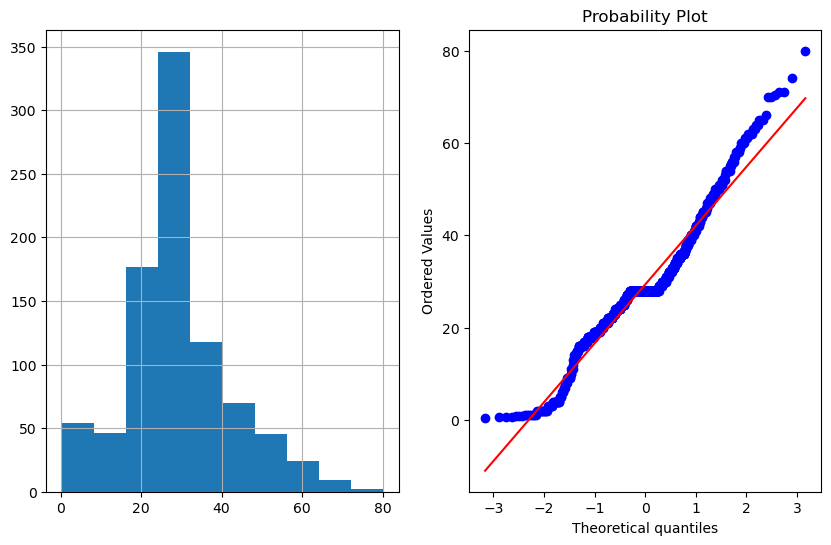

In [11]:
graph_plot(df,'Age')

### logarithamic Transformation

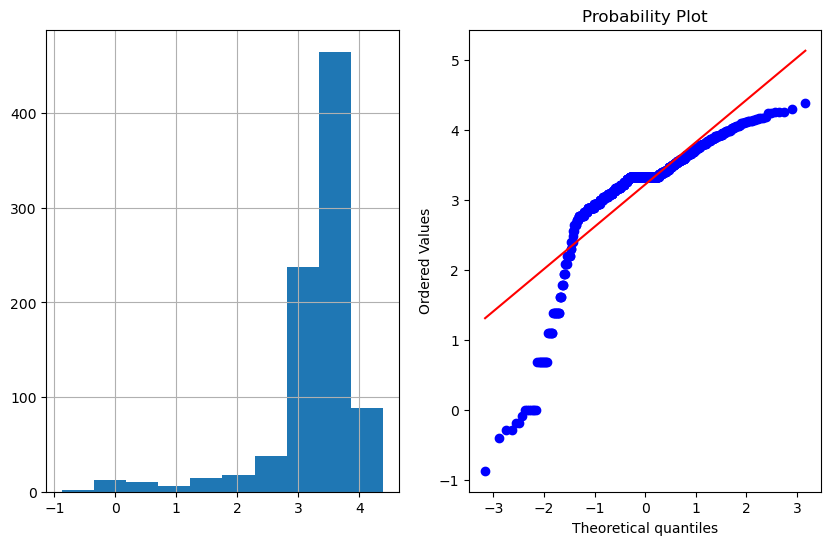

In [12]:
import numpy as np
df['Age_log'] = np.log(df['Age'])
graph_plot(df,'Age_log')

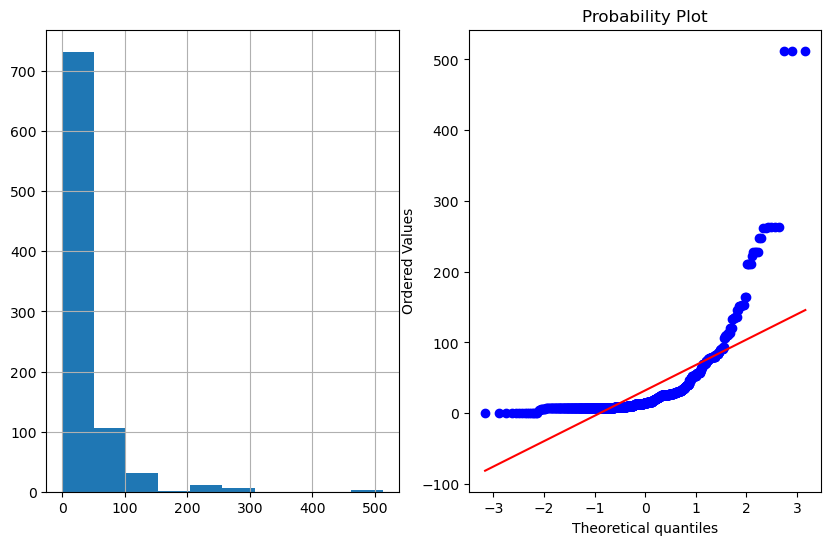

In [13]:
graph_plot(df,'Fare')

The above graph is looking like a Right skewed so when we plot a Q-Q plot It getting Different range i.e., not getting proper straight line.

Now, The distribution is going to transform from right to log normal distribution so that it may get some straight line when compares to previous Fare graph.

In [28]:
df.drop(df[df.Fare == 0].index, inplace=True) # Deleting 0 values in Fare column because log0 is infinity.

In [32]:
df.head()

,Survived,Pclass,Age,Fare,Age_log,Fare_log
0,0,3,22.0,7.2500,3.091042,1.981001
1,1,1,38.0,71.2833,3.637586,4.266662
2,1,3,26.0,7.9250,3.258097,2.070022
3,1,1,35.0,53.1000,3.555348,3.972177
4,0,3,35.0,8.0500,3.555348,2.085672


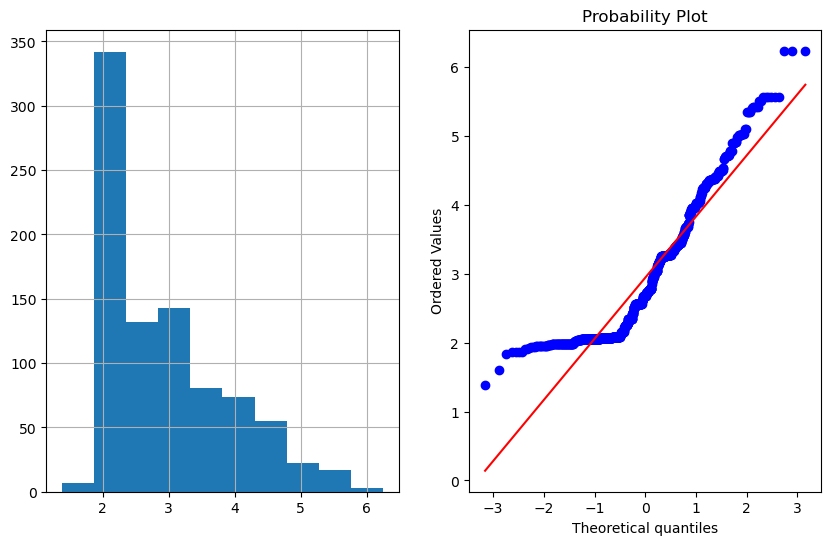

In [33]:
graph_plot(df,'Fare_log')

The conclusion is Now the graph look like better when compare previous graph. It is lognormal distribution so that the dispersion comes to normal distibuted.

### Reciprocal Transformation

In [34]:
df['Age_reciprocal'] = 1/df['Age']

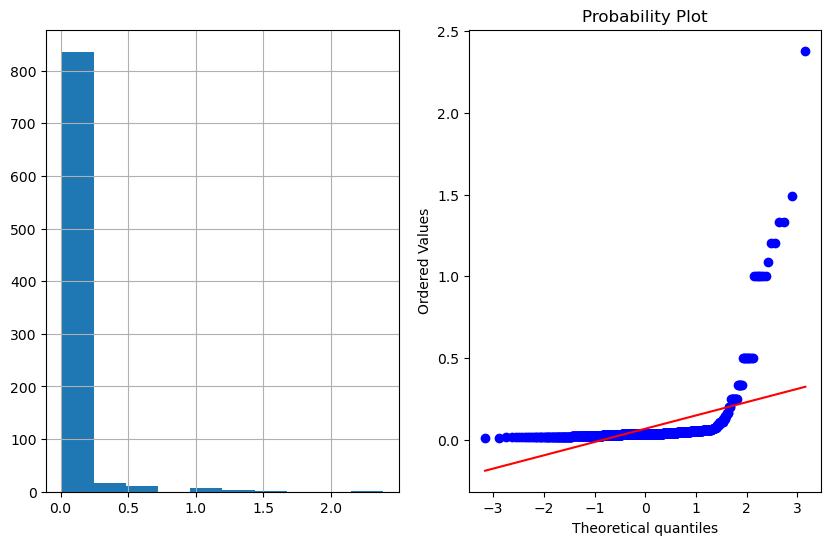

In [35]:
graph_plot(df,'Age_reciprocal')

### SquareRoot Transformation

In [36]:
df['Age_sqrt'] = df['Age']**2

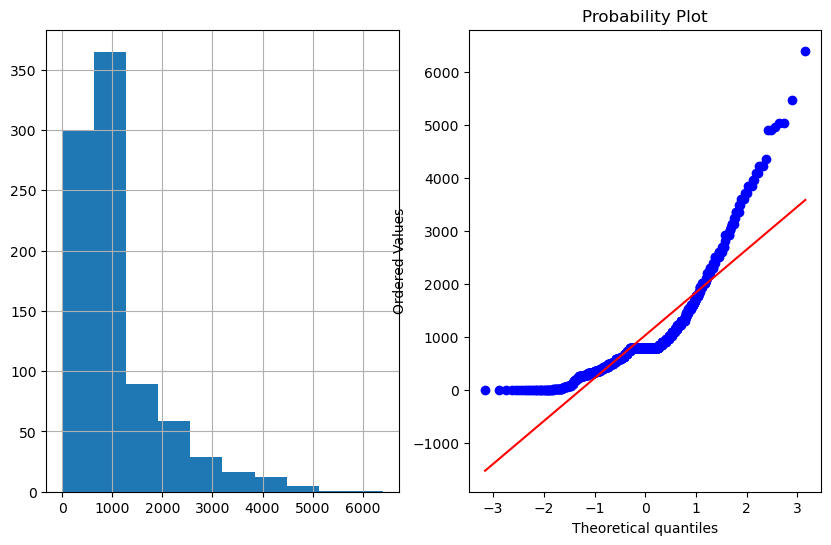

In [37]:
graph_plot(df,'Age_sqrt')

### Exponential Transformation

In [38]:
df['Age_exp'] = df['Age']**(1/1.2)

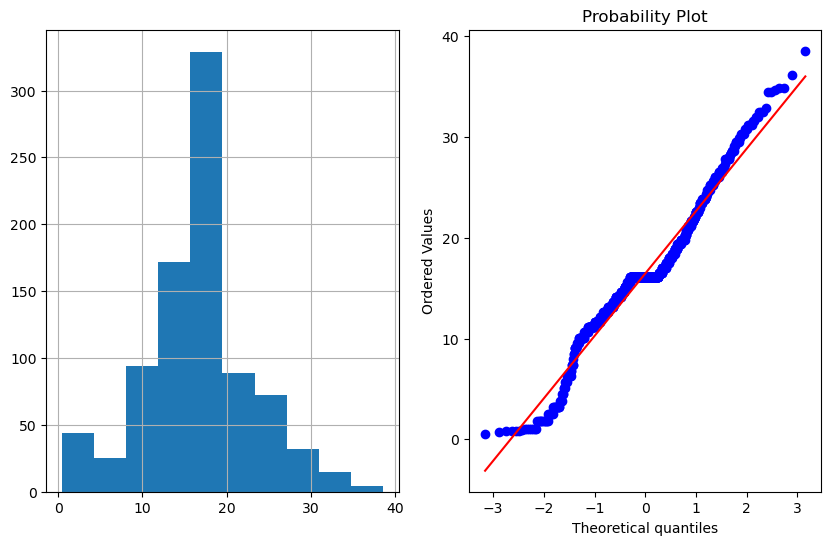

In [39]:
graph_plot(df,'Age_exp')

### Box-Cox Transformation

! [box-cox](https://editor.analyticsvidhya.com/uploads/52112boxcox.png)

In [41]:
df['Age_box-cox'],parameters=stats.boxcox(df['Age'])

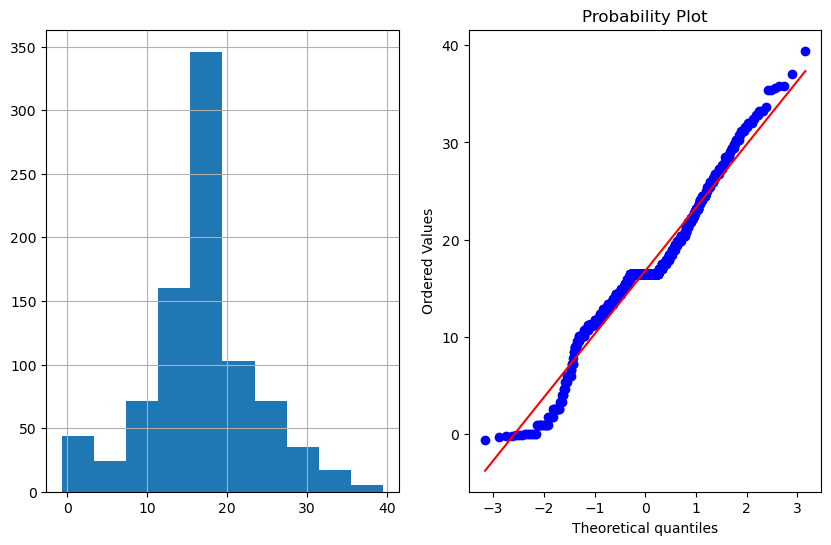

In [42]:
graph_plot(df,'Age_box-cox')